In [1]:
### Import basic packages
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer


# Required prediction modelling libraries are imported
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score
from sklearn.metrics import RocCurveDisplay
import xgboost as XGB
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score

# learning curve
from mlxtend.plotting import plot_learning_curves

# Class prediction error
from yellowbrick.classifier import ClassPredictionError

#feature importance
import eli5 as eli
from sklearn.inspection import permutation_importance
import shap

# Hypothesis testing for comparing algorithms: whether the difference between two models is real and not just a statistical fluke
from mlxtend.evaluate import paired_ttest_5x2cv

In [2]:
final_data=pd.read_pickle("data_ready_analysis.pkl")
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      23472 non-null  object
 1   rating                   23472 non-null  object
 2   positive_feedback_count  23472 non-null  object
 3   division                 23472 non-null  object
 4   department               23472 non-null  object
 5   clothing_class           23472 non-null  object
 6   final_text               23472 non-null  object
 7   recommended_or_not       23472 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [3]:
# convert data types
final_data = final_data.astype({'age': 'int', 'rating': 'int', 'positive_feedback_count':'int', 'division':'category', 'department':'category', 'clothing_class':'category'})
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      23472 non-null  int32   
 1   rating                   23472 non-null  int32   
 2   positive_feedback_count  23472 non-null  int32   
 3   division                 23472 non-null  category
 4   department               23472 non-null  category
 5   clothing_class           23472 non-null  category
 6   final_text               23472 non-null  object  
 7   recommended_or_not       23472 non-null  object  
dtypes: category(3), int32(3), object(2)
memory usage: 895.0+ KB


In [4]:
#final_data.drop("clothing_class", axis=1, inplace=True)
final_data = pd.get_dummies(data=final_data, columns=['division', 'department','clothing_class'], drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   age                            23472 non-null  int32 
 1   rating                         23472 non-null  int32 
 2   positive_feedback_count        23472 non-null  int32 
 3   final_text                     23472 non-null  object
 4   recommended_or_not             23472 non-null  object
 5   division_general petite        23472 non-null  uint8 
 6   division_initmates             23472 non-null  uint8 
 7   department_dresses             23472 non-null  uint8 
 8   department_intimate            23472 non-null  uint8 
 9   department_jackets             23472 non-null  uint8 
 10  department_tops                23472 non-null  uint8 
 11  department_trend               23472 non-null  uint8 
 12  clothing_class_casual bottoms  23472 non-null  uint8 
 13  c

In [5]:
final_data=final_data.iloc[:, [3,4,0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   final_text                     23472 non-null  object
 1   recommended_or_not             23472 non-null  object
 2   age                            23472 non-null  int32 
 3   rating                         23472 non-null  int32 
 4   positive_feedback_count        23472 non-null  int32 
 5   division_general petite        23472 non-null  uint8 
 6   division_initmates             23472 non-null  uint8 
 7   department_dresses             23472 non-null  uint8 
 8   department_intimate            23472 non-null  uint8 
 9   department_jackets             23472 non-null  uint8 
 10  department_tops                23472 non-null  uint8 
 11  department_trend               23472 non-null  uint8 
 12  clothing_class_casual bottoms  23472 non-null  uint8 
 13  c

In [6]:
X = final_data.drop(columns=['recommended_or_not']).values
y = final_data['recommended_or_not'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, stratify=y, random_state=501)
data_vis=final_data.drop('recommended_or_not', axis=1)
print('training set: {0}，test set: {1}'.format(X_train.shape[0], X_test.shape[0]))

training set: 15726，test set: 7746


In [8]:
print(Counter(y_train))
print(Counter(y_test))

Counter({'1': 12931, '0': 2795})
Counter({'1': 6369, '0': 1377})


In [9]:
print(X_train)

[['must dress dress much better person pictur detail sleev button front show qualiti make origin look dress ive wore yesterday first time receiv compliment buy sell'
  45 5 ... 0 0 0]
 ['purpl floral tee think review say basic tee littl tailor upper back varieti color purchas purpl floral tee local store prettier person websit much vibrant color tt'
  60 5 ... 0 0 0]
 ['worth never buy anyth retail full price get tri local store especi sinc back order long flatter super comfort fulli line see elast waist that hidden sweater top easi throw dress even loung day pool beach look model pic concern arm pit hole came low case'
  52 5 ... 0 0 0]
 ...
 ['fun top order orang motif short sleevesand got order love littl big want looser top look someth bright fun spring time could wear work nice slack dress jean top meet need sure realli like detail top collarbon area husband love bright cheer take win'
  36 5 ... 0 0 0]
 ['super cute super cute love tie leg fit true size bought sale black mark fro

> SMOTE does not work here due to text data. 
> Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.
> If I go for traditional random over-sampling method, it may cause overfitting and poor generalization to the test test.

> PREPARING TEXT & NUMERIC DATA FOR THE ANALYSIS
> After the train-test split, I converted both X_train and X_test into a dataframe so that I can perform Term Frequency - Inverse Document Frequency - tfidf (convert texts into numbers based on words importance). Please do not forget that the data still includes text, numeric, and categorical features.
> Then I take the data with tfidf scores and merge it with the previously created dataframe by dropping text column.
> The last step is to transform the new data frame to an array because the ML algorithms work only with array. 

In [10]:
X_train_dframe=pd.DataFrame(X_train, columns = ['final_text','age','rating','positive_feedback_count','division_general petite','division_initmates','department_dresses','department_intimate','department_jackets','department_tops','department_trend','clothing_class_casual bottoms','clothing_class_chemises',' clothing_class_dresses','clothing_class_fine gauge','clothing_class_intimates','clothing_class_jackets','clothing_class_jeans','clothing_class_knits','clothing_class_layering','clothing_class_legwear','clothing_class_lounge','clothing_class_outwear','clothing_class_pants','clothing_class_shorts','clothing_class_skirts','clothing_class_sleep','clothing_class_sweaters','clothing_class_swim','clothing_class_trend'])
X_train_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726 entries, 0 to 15725
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   final_text                     15726 non-null  object
 1   age                            15726 non-null  object
 2   rating                         15726 non-null  object
 3   positive_feedback_count        15726 non-null  object
 4   division_general petite        15726 non-null  object
 5   division_initmates             15726 non-null  object
 6   department_dresses             15726 non-null  object
 7   department_intimate            15726 non-null  object
 8   department_jackets             15726 non-null  object
 9   department_tops                15726 non-null  object
 10  department_trend               15726 non-null  object
 11  clothing_class_casual bottoms  15726 non-null  object
 12  clothing_class_chemises        15726 non-null  object
 13   

In [11]:
col = 'final_text'
b2 = X_train_dframe[col][0]
model = TfidfVectorizer(analyzer='word').fit(X_train_dframe[col])
def myfunction(b2):
    mtx = model.transform([b2])
    return pd.Series(mtx.toarray().flatten())

In [12]:
tmpx= X_train_dframe[col].apply(myfunction)
tmpx.columns = model.get_feature_names_out()

In [13]:
result = pd.merge(X_train_dframe, tmpx, left_index=True, right_index=True)
result = result.drop(['final_text'], axis=1)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726 entries, 0 to 15725
Columns: 11629 entries, age_x to zuma
dtypes: float64(11600), object(29)
memory usage: 1.4+ GB


In [14]:
X_train_final=result.to_numpy()
X_train_final.shape

(15726, 11629)

In [15]:
## For the text data
X_test_dframe=pd.DataFrame(X_test, columns = ['final_text','age','rating','positive_feedback_count','division_general petite','division_initmates','department_dresses','department_intimate','department_jackets','department_tops','department_trend','clothing_class_casual bottoms','clothing_class_chemises',' clothing_class_dresses','clothing_class_fine gauge','clothing_class_intimates','clothing_class_jackets','clothing_class_jeans','clothing_class_knits','clothing_class_layering','clothing_class_legwear','clothing_class_lounge','clothing_class_outwear','clothing_class_pants','clothing_class_shorts','clothing_class_skirts','clothing_class_sleep','clothing_class_sweaters','clothing_class_swim','clothing_class_trend'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7746 entries, 0 to 7745
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   final_text                     7746 non-null   object
 1   age                            7746 non-null   object
 2   rating                         7746 non-null   object
 3   positive_feedback_count        7746 non-null   object
 4   division_general petite        7746 non-null   object
 5   division_initmates             7746 non-null   object
 6   department_dresses             7746 non-null   object
 7   department_intimate            7746 non-null   object
 8   department_jackets             7746 non-null   object
 9   department_tops                7746 non-null   object
 10  department_trend               7746 non-null   object
 11  clothing_class_casual bottoms  7746 non-null   object
 12  clothing_class_chemises        7746 non-null   object
 13   cl

In [16]:
vd= X_test_dframe[col].apply(myfunction)
vd.columns = model.get_feature_names_out()

In [18]:
result_2 = pd.merge(X_test_dframe, vd, left_index=True, right_index=True)
result_2 = result_2.drop(['final_text'], axis=1)
result_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7746 entries, 0 to 7745
Columns: 11629 entries, age_x to zuma
dtypes: float64(11600), object(29)
memory usage: 687.2+ MB


In [19]:
X_test_final=result_2.to_numpy()
X_test_final.shape

(7746, 11629)

#### MACHINE LEARNING MODELS

[[1316   61]
 [ 436 5933]] : is the confusion matrix 

0.9358378517944745 : is the accuracy score 

0.9759464900851333 : is the roc score 



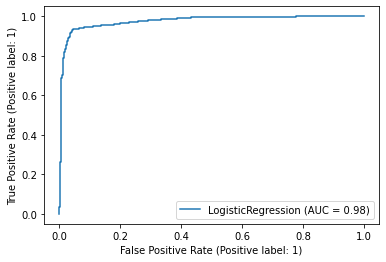

In [ ]:
# Logistic Regression
lr_bestmodel=LogisticRegression(C=0.1, class_weight='balanced',max_iter=100, penalty='l2', solver='liblinear', random_state=502)
lr_bestmodel.fit(X_train_final,y_train)
y_bestpred=lr_bestmodel.predict(X_test_final)
print(confusion_matrix(y_test, y_bestpred), ": is the confusion matrix \n")
print(accuracy_score(y_test, y_bestpred), ": is the accuracy score \n")
print(roc_auc_score(y_test, lr_bestmodel.predict_proba(X_test_final)[:, 1]), ": is the roc score \n")
lr_accuracy=lr_bestmodel.score(X_test_final,y_test)*100
lr_accuracy=lr_accuracy.round(decimals=2)
lr_disp = RocCurveDisplay.from_estimator(lr_bestmodel, X_test_final, y_test)

In [ ]:
print(f'Train Accuracy: {lr_bestmodel.score(X_train_final,y_train)*100}%')
print(f'Test Accuracy: {lr_bestmodel.score(X_test_final,y_test)*100}%')

Train Accuracy: 93.5902327355971%
Test Accuracy: 93.58378517944746%


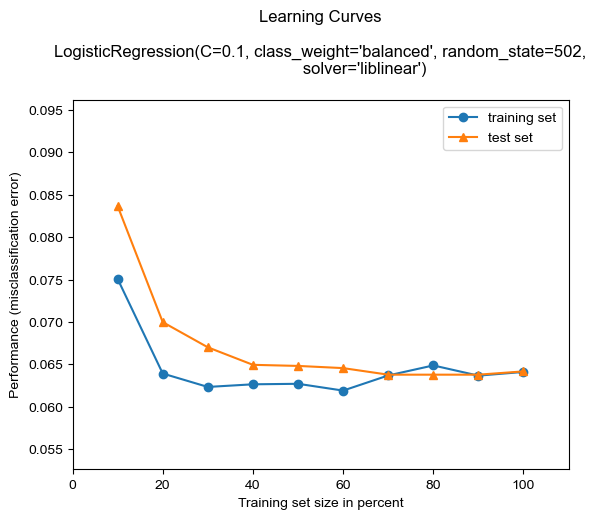

In [ ]:
plot_learning_curves(X_train_final, y_train, X_test_final, y_test, lr_bestmodel)
plt.show()

> SHORT_CUT MODELS
> the following functions were taken from the following website: https://www.kaggle.com/code/legendsoul/complaint-analysis-of-e-commerce-reviews. 

In [20]:
original_models = {
    "Logistic Regression": LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False),
    "Random Forest": RandomForestClassifier(max_depth=50, min_samples_split=25, criterion = 'entropy',  n_jobs=-1, random_state=606),
    "XgBoost Classifier": XGB.XGBClassifier(max_depth = 5, learning_rate= 0.2, n_jobs=-1, n_estimators =  600),
}

for name, model in original_models.items():
  model.fit(X_train_final, y_train)
  print(name + ' trained.')

Logistic Regression trained.
Random Forest trained.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XgBoost Classifier trained.


In [21]:
original_results = []
data = []
columns = ["Accuracy", "Precision", "Recall", "F1-Score"]

for name, model in original_models.items():
  result = model.score(X_test_final, y_test)
  original_results.append(result)

  print("""
  __________________________"""+name+"""__________________________
  """)

  model = original_models[name]
  y_test_pred = model.predict(X_test_final)
  arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
  
  accuracy = model.score(X_test_final, y_test)
  precision = metrics.precision_score(y_test, y_test_pred, average='macro')
  recall = metrics.recall_score(y_test, y_test_pred, average='macro')
  f1_score = metrics.f1_score(y_test_pred, y_test, average='macro')

  values = [accuracy, precision, recall, f1_score]
  zipped = zip(columns, values)
  a_dictionary = dict(zipped)
  ##print(a_dictionary)
  data.append(a_dictionary)

  print(confusion_matrix(**arg_test))
  print(classification_report(**arg_test))

  print(name + ': {:.5f}%'.format(result * 100))


  __________________________Logistic Regression__________________________
  
[[1203  174]
 [ 283 6086]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1377
           1       0.97      0.96      0.96      6369

    accuracy                           0.94      7746
   macro avg       0.89      0.91      0.90      7746
weighted avg       0.94      0.94      0.94      7746

Logistic Regression: 94.10018%

  __________________________Random Forest__________________________
  
[[ 549  828]
 [  56 6313]]
              precision    recall  f1-score   support

           0       0.91      0.40      0.55      1377
           1       0.88      0.99      0.93      6369

    accuracy                           0.89      7746
   macro avg       0.90      0.69      0.74      7746
weighted avg       0.89      0.89      0.87      7746

Random Forest: 88.58766%

  __________________________XgBoost Classifier__________________________
  
[[1161  2

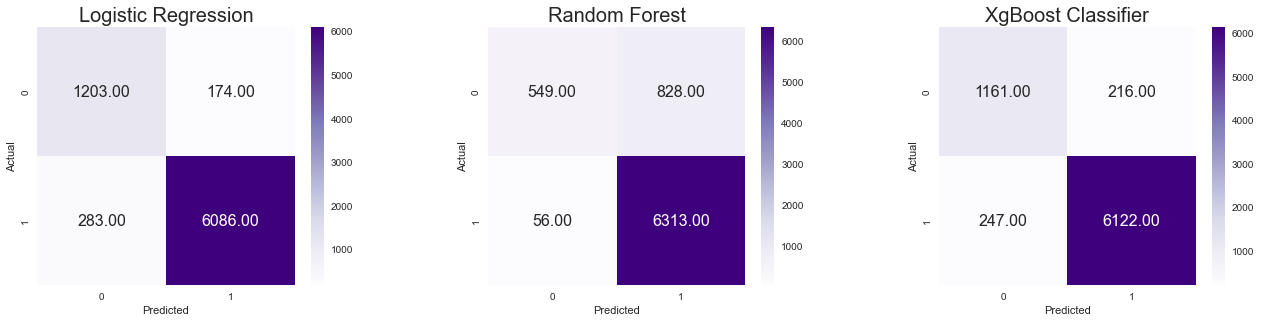

In [22]:
# Plotting confusion matrix for each classifier

a = 3  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30, 18))

for name, model in original_models.items():
    original_results = model.score(X_test_final, y_test)
    model = original_models[name]
    y_test_pred = model.predict(X_test_final)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx0 = confusion_matrix(y_test, y_test_pred)

    heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm0.index.name = 'Actual'
    heat_cm0.columns.name = 'Predicted'

    plt.subplot(a, b, c)
    #plt.title(name)
    fig.subplots_adjust(left=None, bottom=None, right= None, top=None, wspace=0.4, hspace= 0.4)
    sns.heatmap(heat_cm0, annot=True, fmt='.2f', square=True, annot_kws={"size": 16}, cmap = 'Purples').set_title(name, fontsize = 20)
    c = c + 1

    plt.savefig('ConfusionMatrices.png')
plt.show()

In [24]:
performance = pd.DataFrame()
performance.reindex(columns=[*performance.columns.tolist(), "Accuracy", "Precision", "Recall", "F1-Score"], fill_value = 0)

keys = list(original_models.keys())
performance_measures = performance.append(data, True)
performance_measures.set_axis([keys], axis='index')

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.941002,0.890880,0.914602,0.902095
Random Forest,0.885877,0.895744,0.694950,0.744276
XgBoost Classifier,0.940227,0.895247,0.902178,0.898658


In [ ]:
# This dataset is used many times for demonstrating how to work with text data in Machine Learning; however, the example algorithms predict the target feature only by text data. In this project, I employed all the available data including numeric, categorical and text data.
# The numeric features contribute to the prediction accuracy around 5% in Logistic Regression, 7% in Random Forest, and 6% in XGBoost.

> Why did Random Forest perform so terribly? Here are some of the possible explanations:

> Maybe during the bootstrapping, some observations were not included into the samples. 
> Well, maybe the depth of Trees were set to a very large number, which can be way too big for the size of the training set. That will overfit.
> there is one feature that an importance that is out of proportion compared to the rest.
> the number of columns > the number of observations in the training set - boosting helps with that but bootstrapping algorithms may perform worse under this condition. 